In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ImageDraw
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv('10fold/pneumonia-test-2.csv', sep=';')
data2 = pd.read_csv('10fold/pneumonia-train-2.csv', sep=';')

In [6]:
un_data = data.drop_duplicates(subset=['patientId'])
un_data2= data2.drop_duplicates(subset=['patientId'])
un_data3 = pd.concat([un_data, un_data2])  # type: pd.DataFrame
un_data3['Target'].value_counts()

0    20672
1     6012
Name: Target, dtype: int64

In [4]:
un_data  #(2668)
un_data2 # (24016)
repetitions = data.duplicated(subset=['patientId']).value_counts()

In [5]:
repetitions = un_data3.duplicated(subset=['Target']).value_counts()
repetitions

False    26684
dtype: int64

In [7]:
data = data.append(data2, ignore_index=True)
print(data['Target'].value_counts())
data = data.loc[data['Target'] != 0]
data.head()
data['center_x'] = data['x'] + data['width'] / 2
data['center_y'] = data['y'] + data['height'] / 2

0    18588
1     9555
Name: Target, dtype: int64


/home/luisfelipehsr/anaconda3/envs/bias/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
data.describe()

,Target,center_x,center_y,height,width,x,y
count,9555.0,9555.000000,9555.000000,9555.000000,9555.000000,9555.000000,9555.000000
mean,1.0,503.283412,531.474411,329.269702,218.471376,394.047724,366.839560
std,0.0,204.982559,115.071015,157.750755,59.289475,204.574172,148.940488
min,1.0,87.500000,130.000000,45.000000,40.000000,2.000000,2.000000
25%,1.0,314.500000,455.000000,203.000000,177.000000,207.000000,249.000000
50%,1.0,415.000000,531.000000,298.000000,217.000000,324.000000,365.000000
75%,1.0,709.000000,609.000000,438.000000,259.000000,594.000000,478.500000
max,1.0,899.500000,945.000000,942.000000,528.000000,835.000000,881.000000


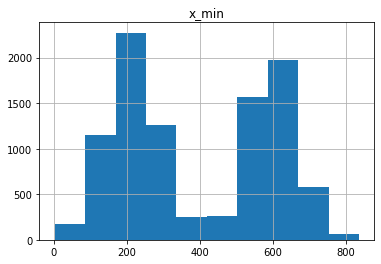

In [9]:
histo = data['x'].hist()
histo.set_title("x_min")
histo

In [13]:
center_x = data['x'] + (data['width']/2)
print(center_x.describe())

histo = (data['x'] + data['width']).hist()
histo.set_title("x_max")
histo.plot()

In [14]:
histo = data['y'].hist()
histo.set_title("y_min")
histo.plot()

In [ ]:
center_y = data['y'] + data['height']/2
print(center_y.describe())

histo = (data['y'] + data['height']).hist()
histo.set_title("y_max")
histo.plot()

In [ ]:
print(data['width'].describe())
histo = data['width'].hist()
histo.set_title("width")
histo.plot()

In [ ]:
print(data['height'].describe())
histo = data['height'].hist()
histo.set_title("height")
histo.plot()

In [ ]:
# full box


In [ ]:
def draw_rectangle(image, x_min, y_min, width, height, color='yellow', size=1):
    draw = ImageDraw.Draw(image)
    coordinates = [x_min, y_min, x_min + width + 1, y_min + height + 1]
    draw.rectangle(xy=coordinates, width=size, outline=color)
    return image

def show_grid(images, images_per_line=3):
    #creates a new empty image, RGB mode, and size 400 by 400.
    width, height = images[0].size
    num_lines = int(np.ceil(len(images) / images_per_line))
    grid_width = int(width * images_per_line)
    grid_height = int(height * num_lines)
    background = Image.new('RGB', (grid_width, grid_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    for i in range(num_lines):
        for j in range(images_per_line):
            idx = i * images_per_line + j
            image = images[idx]
            x = j * width
            y = i * height
            #paste the image at location i,j:
            background.paste(image, (x,y))
    
    return background

In [ ]:
num_images = 10
names = []
for i in range(num_images):
    data_filtered = data.drop_duplicates(subset='patientId')
    example = data_filtered.iloc[i]
    patientId = example['patientId']
    name = patientId + '.jpg'
    print(name)
    names.append(name)

images = []
for i in range(num_images):
    name = names[i]
    examples = data.loc[data['patientId'] == name[:-4]]
    
    image = Image.open(os.path.join('images/train', name))
    
    for j in range(len(examples)):
        example = examples.iloc[j]
        image = draw_rectangle(image=image,
                                 x_min=example['x'],
                                 y_min=example['y'],
                                 width=example['width'],
                                 height=example['height'],
                                 color='yellow',
                                 size=4)
    images.append(image)
show_grid(images, images_per_line=2)